In [1]:
import pandas as pd
import sweetviz as sv

In [2]:
merge_high_and_low = False

In [3]:
df_tlulit = pd.read_csv('Tluliot_Table_update.csv')
df_random = pd.read_csv('Random_Table.csv')
if merge_high_and_low:
    df_tlulit['Type'] = df_tlulit['Type'].map({'High': 'Mound', 'Low': 'Mound', 'Built': 'Built'})

In [4]:
df_random = df_random.rename(columns={'slope': 'Slope'})
df_random

,OID,Hight,AspectDegree,Aspect,FlowDirCode,FlowDir,Slope,NEAR_FID,NEAR_DIST,Geology,GeoCode
0,1,332.636810,49.964943,Northeast,128,Northeast,4.842978,179,23.712576,Kum,23
1,2,422.729828,241.040237,Southwest,16,West,4.572840,10,0.619252,Kush,26
2,3,414.432129,242.253677,Southwest,8,Southwest,2.442250,319,58.490222,Kush,26
3,4,358.887360,81.272728,East,1,East,1.731897,253,21.808663,Kush,26
4,5,346.227020,269.509399,West,16,West,4.907228,129,33.002913,Kun,25
...,...,...,...,...,...,...,...,...,...,...,...
995,996,305.562225,119.728615,Southeast,2,Southeast,2.658046,200,17.965433,Qls,28
996,997,313.784882,52.614399,Northeast,128,Northeast,6.659200,320,82.716624,NQa,27
997,998,372.322693,275.355438,West,16,West,9.798491,267,7.837793,Kush,26
998,999,375.689331,249.051178,West,8,Southwest,5.593846,272,85.018913,Kush,26


In [5]:
# remove redundant variables
df_tlulit = df_tlulit[['Type', 'Geology', 'FlowDir', 'Aspect', 'Slope', 'Hight', 'NEAR_DIST']]
df_random = df_random[['Geology', 'FlowDir', 'Aspect', 'Slope', 'Hight', 'NEAR_DIST']]

In [6]:
categorical_vars = [
    'Geology',
    'FlowDir',
    'Aspect'
]
numerical_vars = [
    'Slope',
    'Hight',
    'NEAR_DIST'
]

In [7]:
advert_report = sv.analyze(df_tlulit)
advert_report.show_html('Tlulit.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report Tlulit.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [8]:
advert_report = sv.analyze(df_random)
advert_report.show_html('Random.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report Random.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [10]:
df_random['Type'] = 'Random'
df_joint = pd.concat([df_random, df_tlulit])

/Users/yeshel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Slope Built
Slope High
Slope Low
Slope Random


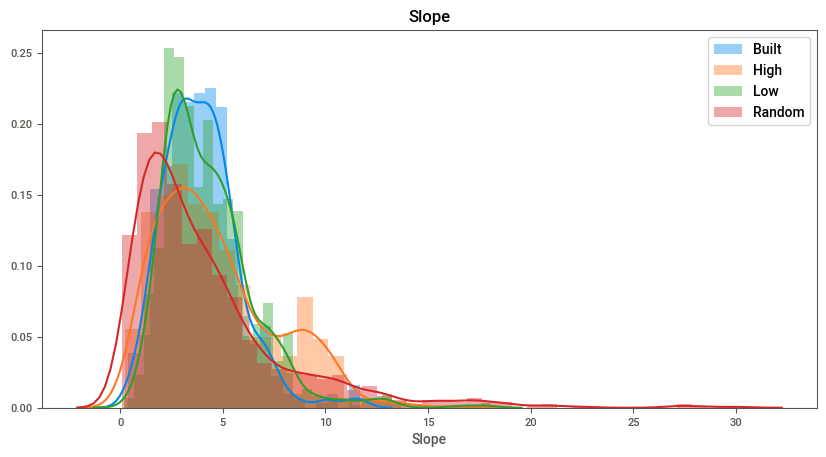

Hight Built
Hight High
Hight Low
Hight Random


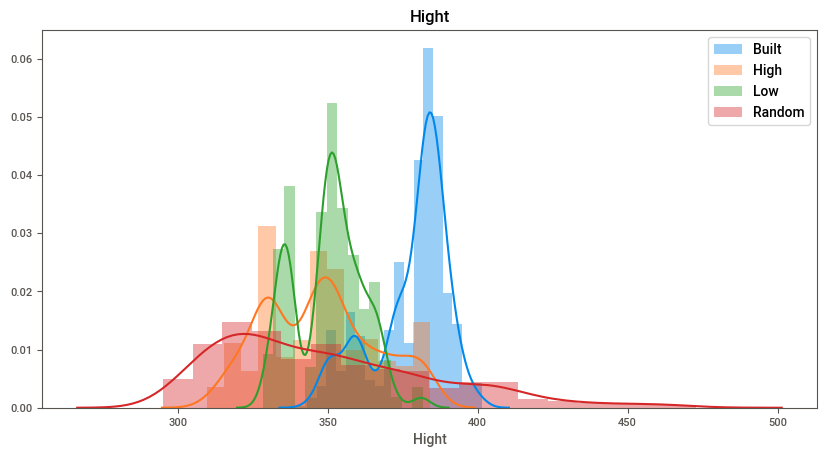

NEAR_DIST Built
NEAR_DIST High
NEAR_DIST Low
NEAR_DIST Random


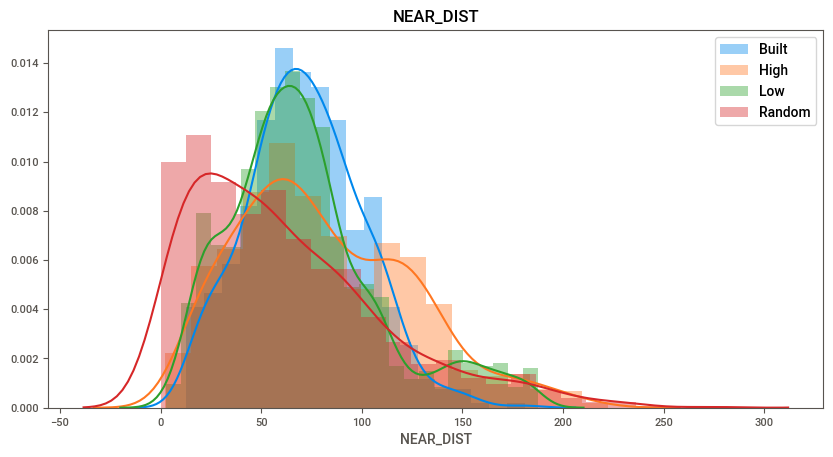

In [11]:
for v in numerical_vars:
    for t, ddf in df_joint.groupby('Type'):
        print(v, t)
        sns.distplot(a=ddf[v], hist=True, label=t)
    plt.legend()
    plt.title(v)
    plt.show()

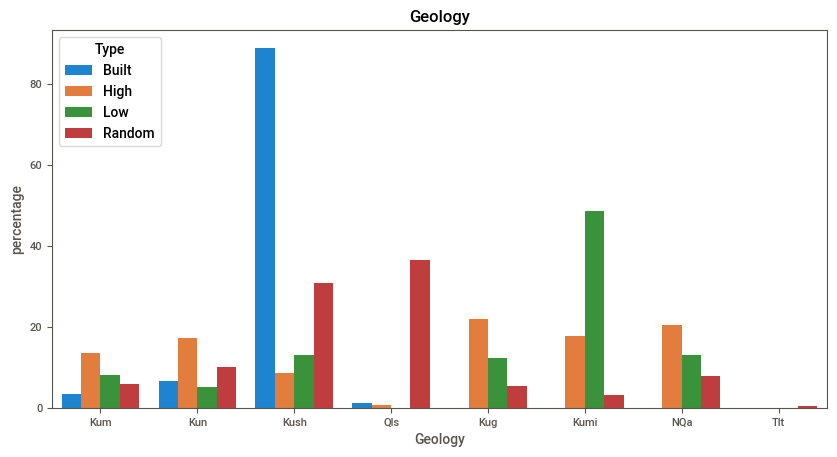

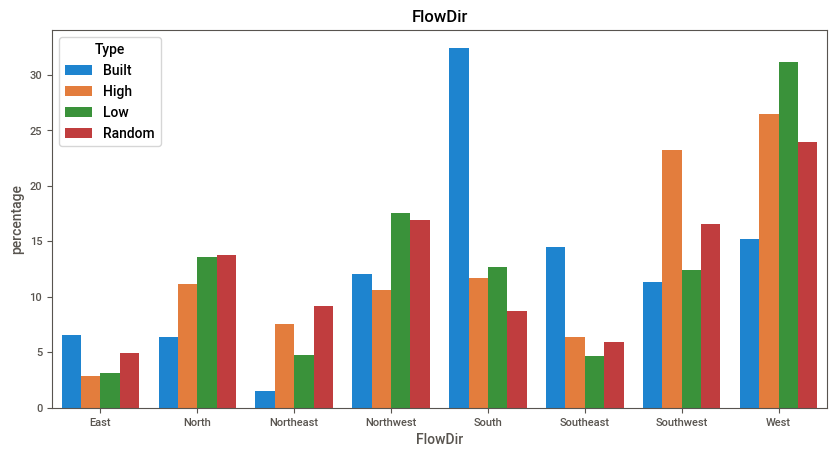

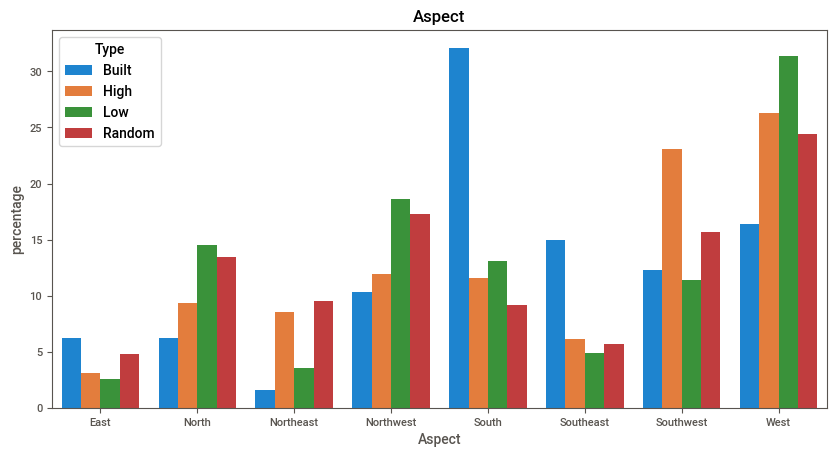

In [12]:
for v in categorical_vars:
    aggregate = []
    for t, ddf in df_joint[['Type', v]].groupby('Type'):
        dddf = ddf.groupby(v).count().reset_index()
        dddf = dddf.rename(columns={'Type': 'percentage'})
        dddf['percentage'] = 100 * dddf['percentage'] / len(ddf)
        dddf['Type'] = t
        aggregate.append(dddf)
    aggregate_df = pd.concat(aggregate)
    sns.barplot(data=aggregate_df, x=v, y='percentage', hue='Type')
    plt.title(v)
    plt.show()

# Build logistic regression model

In [13]:
categorical_vars
cat_features_df = pd.get_dummies(df_tlulit[categorical_vars])
numerical_features_df = df_tlulit[numerical_vars]
numerical_features_df=(numerical_features_df-numerical_features_df.mean())/numerical_features_df.std()
X = pd.concat([cat_features_df, numerical_features_df], axis=1)
target = df_tlulit['Type'].map({'Mound': 0, 'Built': 1})

## How to build logistic model?

In [15]:
from sklearn.linear_model import LogisticRegression
target
model = LogisticRegression()
model.fit(X, target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
coef = []
for i in range(model.coef_.shape[1]):

    coef.append({
        'Variable': X.columns[i],
        'Coefficient': model.coef_[0, i]
    })
pd.DataFrame(coef).sort_values('Coefficient')
